In [14]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
file1 = "Resources/2015.csv"
file2 = "Resources/2016.csv"
file3 = "Resources/2017.csv"
file4 = "Resources/2018.csv"
file5 = "Resources/2019.csv"
health_2015 = pd.read_csv(file1)
health_2016 = pd.read_csv(file2)
health_2017 = pd.read_csv(file3)
health_2018 = pd.read_csv(file4)
health_2019 = pd.read_csv(file5)
frames = [health_2015, health_2016, health_2017, health_2018, health_2019]
result = pd.concat(frames)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 155
Columns: 286 entries, Country to GDP
dtypes: float64(223), int64(62), object(1)
memory usage: 1.7+ MB


In [11]:
health_filt = result[["Country","Adolescent fertility rate (births per 1,000 women ages 15-19)",	"Age dependency ratio (% of working-age population)",	"Age dependency ratio, old",	"Age dependency ratio, young",	"Current health expenditure per capita, PPP (current international $)",	"Fertility rate, total (births per woman)",	"Immunization, BCG (% of one-year-old children)",	"Immunization, DPT (% of children ages 12-23 months)",	"Immunization, HepB3 (% of one-year-old children)",	"Immunization, Hib3 (% of children ages 12-23 months)",	"Immunization, measles (% of children ages 12-23 months)",	"Immunization, measles second dose (% of children by the nationally recommended age)",	"Immunization, Pol3 (% of one-year-old children)",	"Labor force, female (% of total labor force)",	"Life expectancy at birth, female (years)",	"Life expectancy at birth, male (years)",	"Mortality rate, adult, female (per 1,000 female adults)",	"Mortality rate, adult, male (per 1,000 male adults)",	"Mortality rate, infant (per 1,000 live births)",	"Mortality rate, infant, female (per 1,000 live births)",	"Mortality rate, infant, male (per 1,000 live births)",	"Mortality rate, neonatal (per 1,000 live births)",	"Mortality rate, under-5 (per 1,000)",	"Mortality rate, under-5, female (per 1,000)",	"Mortality rate, under-5, male (per 1,000)",	"Number of deaths ages 10-14 years",	"Number of deaths ages 15-19 years",	"Number of deaths ages 20-24 years",	"Number of deaths ages 5-9 years",	"Number of infant deaths",	"Number of infant deaths, female",	"Number of infant deaths, male",	"Number of maternal deaths",	"Number of neonatal deaths",	"Number of stillbirths",	"Number of under-five deaths",	"Number of under-five deaths, female",	"Number of under-five deaths, male",	"Probability of dying among adolescents ages 10-14 years (per 1,000)",	"Probability of dying among adolescents ages 15-19 years (per 1,000)",	"Probability of dying among children ages 5-9 years (per 1,000)",	"Probability of dying among youth ages 20-24 years (per 1,000)",	"Stillbirth rate (per 1,000 total births)",	"Survival to age 65, female (% of cohort)",	"Tuberculosis case detection rate (%, all forms)"]]

In [12]:
health_filt.to_csv("health_filt.csv")

In [6]:
health_2015_clean = health_2015.replace(0, np.nan)
health_2015_clean = health_2015_clean.dropna(how='all')
health_2015_clean.head()

,Country,Happiness Score,Diabetes prevalence (% of population ages 20 to 79),Prevalence of overweight (% of adults),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15-49) newly infected with HIV,"Age at first marriage, female",...,Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV,GDP
0,Switzerland,7.587,NaN,53.9,3.0590,16000.0,500.0,16000.0,500.0,30.6,...,1.168186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82081.59712
1,Iceland,7.561,NaN,58.8,7.5054,NaN,NaN,NaN,NaN,28.1,...,1.077161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52564.42919
2,Denmark,7.527,NaN,55.1,4.2482,NaN,NaN,NaN,NaN,31.7,...,0.839047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53254.85600
3,Norway,7.522,NaN,57.9,5.5002,NaN,NaN,NaN,NaN,31.8,...,1.488338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74355.51586
4,Canada,7.427,NaN,63.7,9.6298,NaN,NaN,NaN,NaN,27.1,...,0.796808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43585.51198


In [8]:
vars = health_2015[['GDP', 'Mortality rate, infant (per 1,000 live births)']]
vars_clean = vars[vars['GDP'] != 0]
# plt.scatter(vars['Urban population (% of total population)'], vars['Life expectancy at birth, total (years)'])
vars_clean = vars_clean.rename_axis('ID').values


In [2]:
# Create dummy data

In [11]:
# Plot and show scatter
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_vars = scaler.fit_transform(vars_clean)

In [12]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans


# Create a kmeans model using k = 12
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_vars)
predicted_clusters = kmeans.predict(scaled_vars)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`

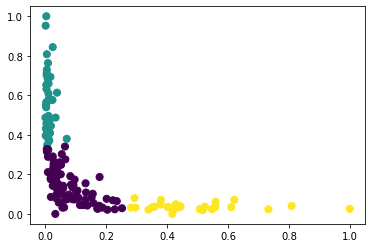

In [13]:
# Plot the clusters
plt.scatter(scaled_vars[:, 0], scaled_vars[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()